In [1]:
from sklearn import linear_model
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("grades.csv", sep="\t")
df

,Class,Term,Median,Grade
0,ENGL015,20F,A-,B+
1,MATH011,20F,A-,A-
2,PHYS013,20F,A,B
3,FREN002,21W,A-,A-
4,WRIT005.26,21W,A,A
5,COLT07.19,21S,A-,A-
6,FREN003,21S,A-,A
7,MATH023,21S,B+,NR
8,AAAS011,21F,A,A
9,ECON01,21F,B+,B+


In [3]:
gpa_dict = {
    "A" : 12, 
    "A-" : 11, 
    "B+" : 10, 
    "B" : 9, 
    "B-" : 8, 
    "C+" : 7, 
    "C" : 6, 
    "TBD" : None
}

term_dict = {
    "20F" : 1, 
    "21W" : 2, 
    "21S" : 3, 
    "21F" : 4, 
    "22W" : 5, 
    "22S" : 6, 
    "22X" : 7, 
    "22F" : 8, 
    "23W" : 9, 
    "23F" : 10, 
    "24W" : 11, 
    "24S" : 12
}

df = df.replace({"Median": gpa_dict, "Grade": gpa_dict, "Term": term_dict})
df = df[df['Grade'] != "NR"]
df['Dept'] = df['Class'].str.extract(r'(^[A-Z]{3,4})')

d = {ni: indi for indi, ni in enumerate(set(df['Dept']))}
df['Dept_num'] = [d[ni] for ni in df['Dept']]

df

,Class,Term,Median,Grade,Dept,Dept_num
0,ENGL015,1,11,10,ENGL,3
1,MATH011,1,11,11,MATH,7
2,PHYS013,1,12,9,PHYS,9
3,FREN002,2,11,11,FREN,6
4,WRIT005.26,2,12,12,WRIT,12
5,COLT07.19,3,11,11,COLT,11
6,FREN003,3,11,12,FREN,6
8,AAAS011,4,12,12,AAAS,2
9,ECON01,4,10,10,ECON,5
10,THEA40,4,12,12,THEA,4


In [4]:
reg = linear_model.Lasso(alpha=0.1)
grades_X = df[["Median", "Term", "Dept_num"]]
grades_y = df["Grade"]

grades_X_train = grades_X[:19]
grades_X_test = grades_X[19:]

grades_y_train = grades_y[:19]
grades_y_test = grades_y[19:]

reg.fit(grades_X_train, grades_y_train)

pred = reg.predict(grades_X_test)

/var/folders/2j/f2bwlr752b95pbc739m9h1wc0000gn/T/ipykernel_74800/1777185064.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  grades_y_train = grades_y[:19]
/var/folders/2j/f2bwlr752b95pbc739m9h1wc0000gn/T/ipykernel_74800/1777185064.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  grades_y_test = grades_y[19:]


In [10]:
pred

array([11.42200469, 10.77099264, 11.40738091,  9.94820437,  9.94820437,
       11.71826315, 11.39275713, 11.39275713, 10.94412532, 11.37813335,
       10.7271213 , 10.5796703 , 11.36350957, 10.71249752])

/var/folders/2j/f2bwlr752b95pbc739m9h1wc0000gn/T/ipykernel_74800/3090170208.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


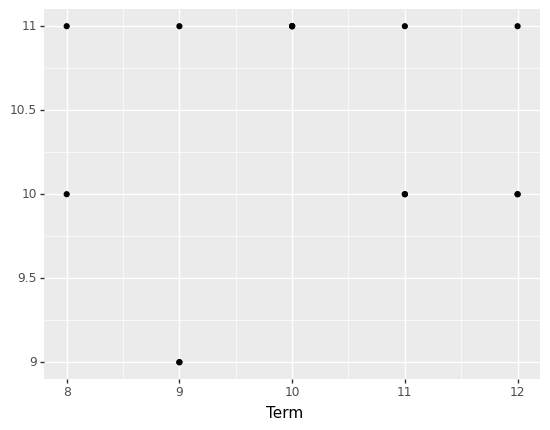

<ggplot: (318886976)>

In [6]:
from plotnine import *
ggplot(aes(x=df['Term'][19:], y=np.floor(pred))) + geom_point()

In [7]:
pred_gpa = df.copy()
pred_gpa['Grade'][19:] = np.rint(pred)

pred_gpa

/var/folders/2j/f2bwlr752b95pbc739m9h1wc0000gn/T/ipykernel_74800/1134823073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/2j/f2bwlr752b95pbc739m9h1wc0000gn/T/ipykernel_74800/1134823073.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


,Class,Term,Median,Grade,Dept,Dept_num
0,ENGL015,1,11,10,ENGL,3
1,MATH011,1,11,11,MATH,7
2,PHYS013,1,12,9,PHYS,9
3,FREN002,2,11,11,FREN,6
4,WRIT005.26,2,12,12,WRIT,12
5,COLT07.19,3,11,11,COLT,11
6,FREN003,3,11,12,FREN,6
8,AAAS011,4,12,12,AAAS,2
9,ECON01,4,10,10,ECON,5
10,THEA40,4,12,12,THEA,4


In [8]:
avg_gpa = round(np.mean(df['Grade'])/3, 2)

print("Your expected average GPA is: " + f'{avg_gpa}')

Your expected average GPA is: 3.56
